In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
a =pd.read_csv("/content/crime_data (1).csv")
a

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
a.describe()


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
a.shape

(50, 5)

In [9]:
a.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [10]:
n = MinMaxScaler()
data= n.fit_transform(a.iloc[:,1:].to_numpy())
a = pd.DataFrame(data, columns = a.columns[1:])
a.head(5)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


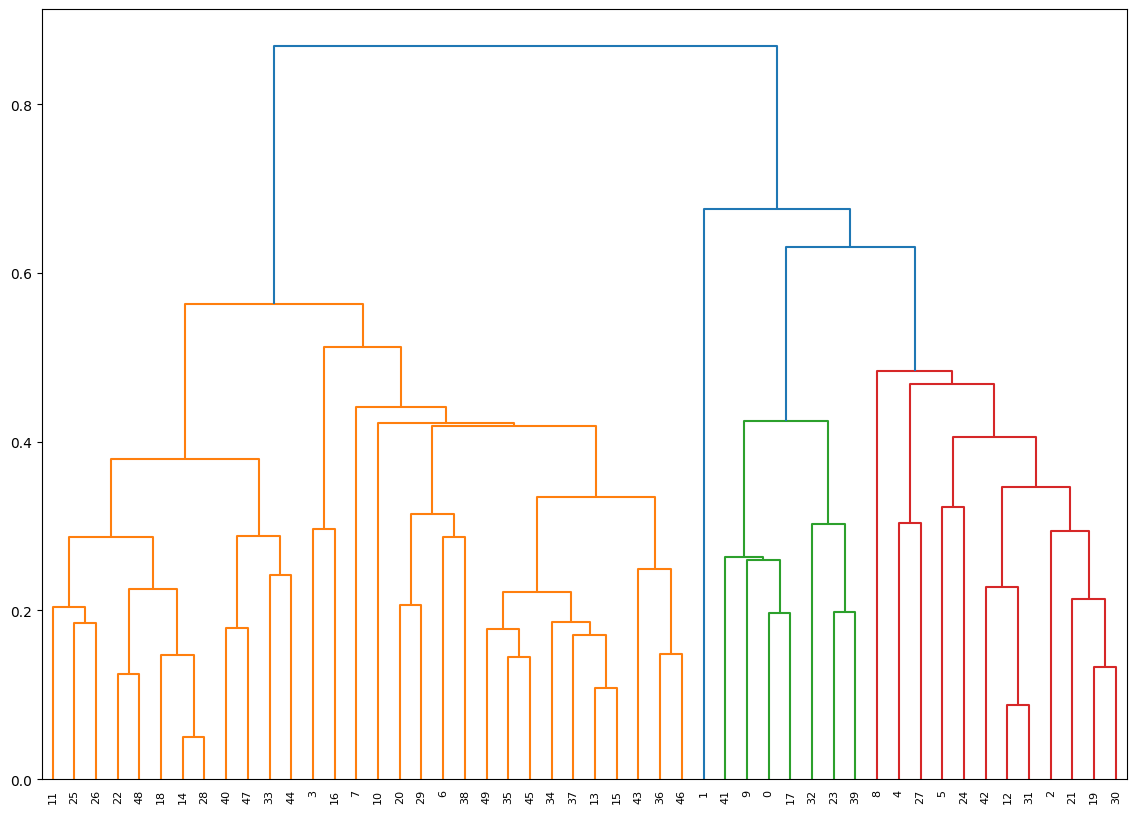

In [11]:
# create dendrogram
plt.figure(figsize = (14, 10));
dendrogram = sch.dendrogram(sch.linkage(a, method='average'))

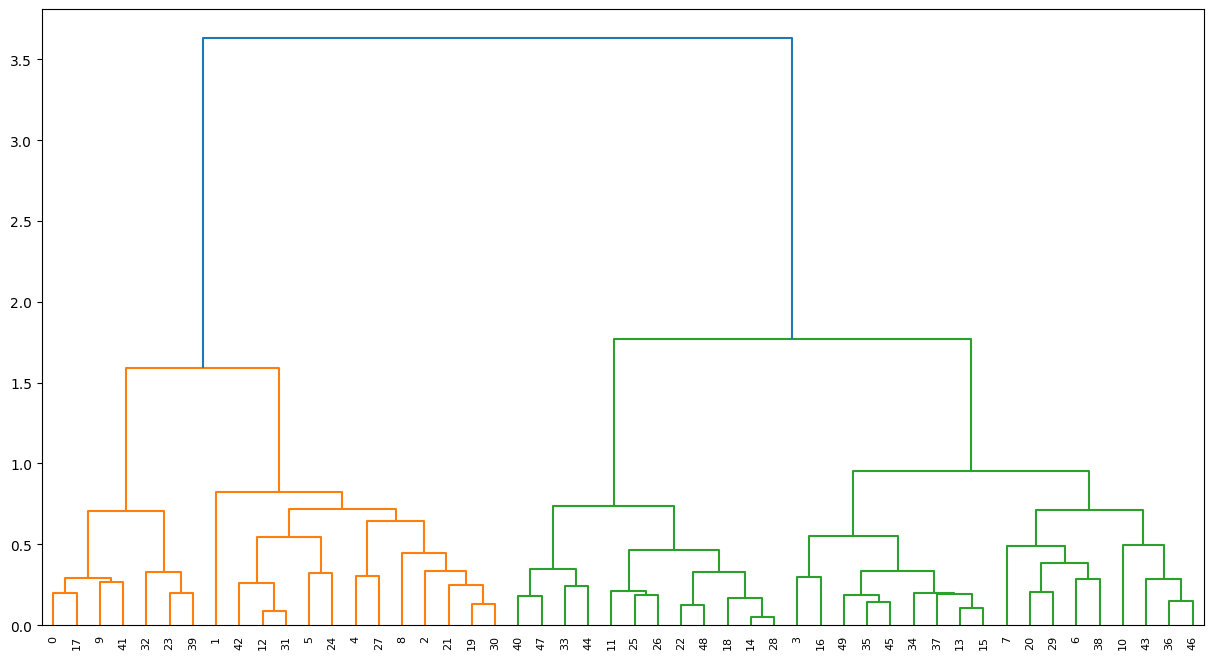

In [12]:
# create dendrogram
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(a, method='ward'))

In [13]:
# create clusters
hc1 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [14]:
# save clusters for chart
y2 = hc1.fit_predict(a)
cc = pd.DataFrame(y2,columns=['Clusters'])
cc.head(6)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Clusters
0,3
1,2
2,1
3,0
4,1
5,1


In [15]:
# create clusters
hc2 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [16]:
# save clusters for chart
y2 = hc2.fit_predict(a)
cc = pd.DataFrame(y2,columns=['Clusters'])
cc.head(6)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Clusters
0,3
1,1
2,1
3,0
4,1
5,1


In [17]:
a2 = pd.concat([a,cc],axis=1)
a2.head(7)

,Murder,Assault,UrbanPop,Rape,Clusters
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,1
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1
5,0.427711,0.544521,0.779661,0.811370,1
6,0.150602,0.222603,0.762712,0.098191,0


In [18]:
a2.sort_values("Clusters").reset_index()

,index,Murder,Assault,UrbanPop,Rape,Clusters
0,49,0.361446,0.397260,0.474576,0.214470,0
1,29,0.397590,0.390411,0.966102,0.297158,0
2,16,0.536145,0.219178,0.338983,0.232558,0
3,15,0.313253,0.239726,0.576271,0.276486,0
4,34,0.391566,0.256849,0.728814,0.364341,0
5,13,0.385542,0.232877,0.559322,0.354005,0
6,35,0.349398,0.363014,0.610169,0.328165,0
7,36,0.246988,0.390411,0.593220,0.568475,0
8,20,0.216867,0.356164,0.898305,0.232558,0
9,10,0.271084,0.003425,0.864407,0.333333,0


In [19]:
a2['Clusters'].value_counts()

0    18
1    13
2    12
3     7
Name: Clusters, dtype: int64

## **K-Means**

In [20]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(a)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [21]:
kmeans.inertia_

3.22507225604479

In [22]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(a)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [23]:
wcss

[13.184122550256447,
 6.596893867946196,
 5.010878493006417,
 3.6834561535859134,
 3.22507225604479,
 2.8520398885211113,
 2.5848664114310447,
 2.314201689711637,
 2.125929265181011]

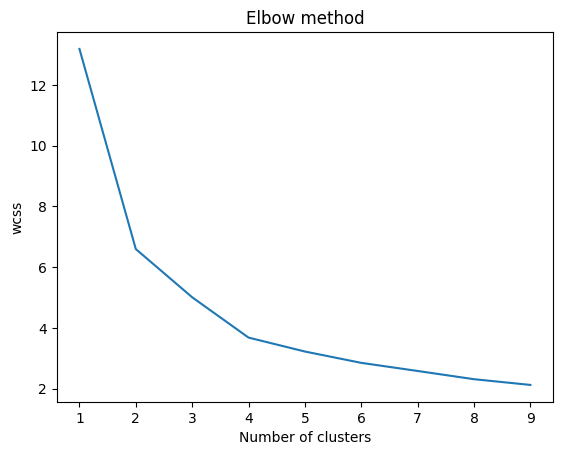

In [24]:
plt.plot(range(1, 10),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [25]:
#Build Cluster algorithm
cc2 = KMeans(4, random_state=8)
cc2.fit(a)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=8)

In [26]:
cc2.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [27]:
a# Converting array to dataframe
df2 = pd.DataFrame(cc2.labels_, columns =['clusters'])

In [28]:

a2 = pd.concat([a,df2], axis=1)
a2.head(4)

,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,1
1,0.554217,0.746575,0.271186,0.961240,3
2,0.439759,0.852740,0.813559,0.612403,3
3,0.481928,0.496575,0.305085,0.315245,1


In [29]:
a2["clusters"].value_counts()

0    17
2    13
3    12
1     8
Name: clusters, dtype: int64

In [30]:
a2.groupby('clusters').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters,,,,
0,0.304394,0.329371,0.705882,0.310990
1,0.791416,0.680223,0.368644,0.364664
2,0.168675,0.114858,0.340287,0.126019
3,0.612450,0.750000,0.754237,0.679802


## **DBSCAN**

In [31]:
array = a.values

In [32]:
stscaler = StandardScaler().fit(array)
X2 = stscaler.transform(array)
X2

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [33]:
dbscan2 = DBSCAN(eps=0.95, min_samples=5)
dbscan2.fit(X2)

DBSCAN(eps=0.95)

In [34]:
#Noisy samples are given the label -1.
dbscan2.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0])

In [35]:
c2 = pd.DataFrame(dbscan2.labels_,columns=['Cluster ID'])
c2.value_counts()

Cluster ID
-1            30
 0            20
dtype: int64

In [36]:
a3 = pd.concat([a,c2],axis=1)
a3

,Murder,Assault,UrbanPop,Rape,Cluster ID
0,0.746988,0.654110,0.440678,0.359173,-1
1,0.554217,0.746575,0.271186,0.961240,-1
2,0.439759,0.852740,0.813559,0.612403,-1
3,0.481928,0.496575,0.305085,0.315245,-1
4,0.493976,0.791096,1.000000,0.860465,-1
5,0.427711,0.544521,0.779661,0.811370,-1
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,-1
8,0.879518,0.993151,0.813559,0.635659,-1
9,1.000000,0.568493,0.474576,0.478036,-1
